<a href="https://colab.research.google.com/github/lamtranBKHN/MAIT_2020_LabMemberDectector/blob/origin/Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import random
import pickle
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
IMG_SIZE = 500
desire = 100

# Folder stores all face-data
parent_dir = '/content/drive/MyDrive/scaleFactor=1.1_minNeighbors=6'

# Folder you want to save face data
store_dir = '/content/drive/MyDrive/Sample_data_31.12_augmentated'
if not os.path.exists(store_dir):
  os.makedirs(store_dir)
for fname in os.listdir(parent_dir):
  print("Processing " + fname + " ... ")
  personal_img_path = os.path.join(parent_dir, fname) 
  store_path = os.path.join(store_dir, fname) 
  # Create store directory if not exist
  if not os.path.exists(store_path):
      os.makedirs(store_path)

  for filename in os.listdir(personal_img_path):
        # img = cv2.imread(os.path.join(personal_img_path,filename))

        datagen = ImageDataGenerator(
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest')
        img = tf.keras.preprocessing.image.load_img(os.path.join(personal_img_path,filename))
        # img = load_img('data/train/cats/cat.0.jpg')  # this is a PIL image
        x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
        x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
        
        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=store_path, save_prefix="a", save_format='jpeg'):
            i += 1
            if i > 20:
                break  # otherwise the generator would loop indefinitely

Processing THHoang_181888 ... 
Processing THGiang_192200 ... 
Processing Thanh_Quang ... 
Processing TDPhu_181692 ... 
Processing Phuong_Anh ... 
Processing PGPhong_181691 ... 
Processing NVMinh_174064 ... 
Processing NVLinh_181579 ... 
Processing NTTung_181828 ... 
Processing NTHLy_181637 ... 
Processing NTHai_173821 ... 
Processing NTCong_179626 ... 
Processing NQThai_192002 ... 
Processing NQAnh_181325 ... 
Processing NNHoang_181492 ... 
Processing Nguyen_Thi_Huong ... 
Processing Nguyen_Ba_Hoang ... 
Processing NDToan_174273 ... 
Processing NDQuan_192034 ... 
Processing NDHuy_161823 ... 
Processing NBHoang_181486 ... 
Processing LTHien_173846 ... 
Processing LDTAnh_181320 ... 
Processing KTAnh_176917 ... 
Processing HDTuan_192259 ... 
Processing DPDuong_181432 ... 
Processing DLTMy_200426 ... 
Processing DADung_181421 ... 
Processing CQDat_181383 ... 
Processing Bui_Quang_Duy ... 
Processing VVHung_192210 ... 
Processing VCThinh_174239 ... 
Processing TVThai_181749 ... 
Processing 

In [ ]:
image_size = (180, 180)
batch_size = 32

parent_dir = '/content/drive/Shareddrives/Lâm_Trần/MAIT2020/data/Sample_data_31.12'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    parent_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    parent_dir,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 209 files belonging to 38 classes.
Using 168 files for training.
Found 209 files belonging to 38 classes.
Using 41 files for validation.


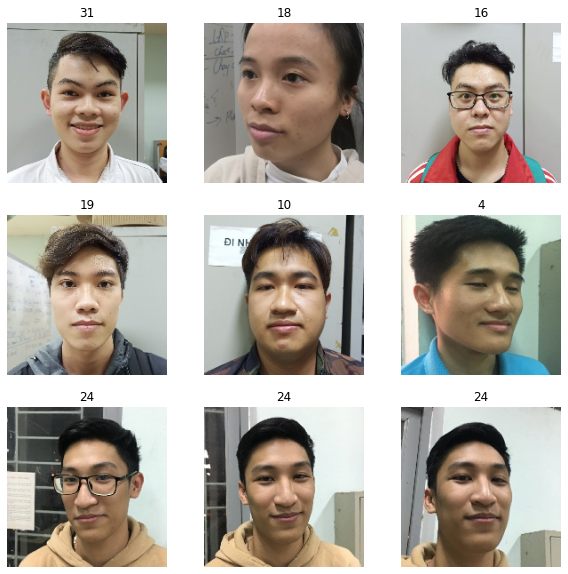

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

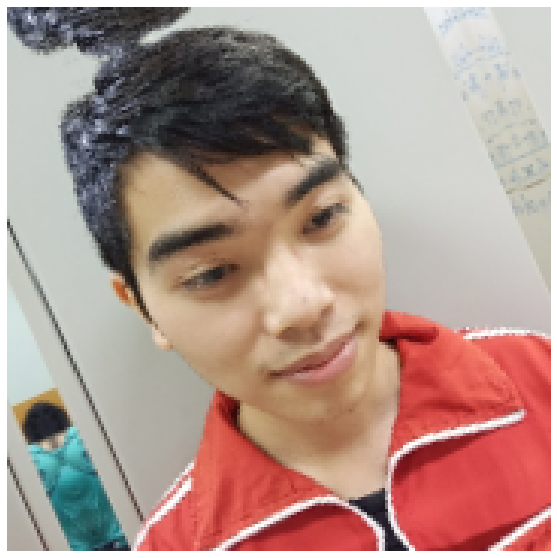

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(1):
        augmented_images = data_augmentation(images)
        # ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('data/train/cats/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely